<a href="https://colab.research.google.com/github/Faraz-Khan02/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as ChromeOS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play has also served as a digital media store, offering games, music, books, movies, and television programs be.Content that has been purchased on Google Play Movies & TV and Google Play Books can be accessed on a web browser, and through the Android and iOS apps.

## The two files on which we are going to Exploratory Data Analysis are:

### *   **Play Store Data.csv**: It contains all the details of the applications on Google Play. It contains 10841 rows and 13 columns that describe a given app.
### *   **User reviews.csv**: It contains reviews for each app which are reviewed by the users. It contains 64295 rows and 5 columns. 


# Now, Let's Explore!







## ***Importing all necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
%matplotlib inline


## ***Let's Explore Play Store DataFrame***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading Play Store Data and User Reviews
file_path_play_store = '/content/drive/MyDrive/Datasets/Play Store Data.csv'
ps_df = pd.read_csv(file_path_play_store)
file_path_user_reviews = '/content/drive/MyDrive/Datasets/User Reviews.csv'
ur_df = pd.read_csv(file_path_user_reviews)

In [4]:
# Getting the shape of both files
print(f'The shape of Play Store Data Dataframe is: {ps_df.shape}')
print(f'The shape of User Reviews Dataframe is: {ur_df.shape}')

The shape of Play Store Data Dataframe is: (10841, 13)
The shape of User Reviews Dataframe is: (64295, 5)


In [5]:
# First five records of Play Store Data
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Last five records of Play Store Data
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
# Info of Play Store Data
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# Print the column of Play Store Data
print(f'The columns of Play Store Dataframe are: \n {ps_df.columns}')

The columns of Play Store Dataframe are: 
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
ps_df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Based on following exploration we conclude the features of each columns:



1.   **App** - It tells us about the name of the application with a short description.
2.   **Category** - It gives the category to the app.

1.   **Rating** - It contains the average rating the respective app received from its users.
2.   **Reviews** - It tells us about the total number of users who have given a review for the app.

1.   **Size** - It tells us about the size being occupied by the app on the mobile phone.
2.   **Installs** - It tells us about the total number of installs/downloads for an app.

1.   **Type** - It states whether an app is free to use or paid.
2.   **Price** - It gives the price payable to install the app. For free type apps, the price is zero.

1.   **Content Rating** - It states whether or not an app is suitable for all age groups or not.
2.   **Genres** - It tells us about the various other categories to which an app can belong.

1.   **Last Updated** - It tells us about the when the app was updated.
2.   **Current Ver** - It tells us about the current version of the application.

1.   **Android Ver** - It tells us about the android version which can support the application on its platform.
















In [7]:
# Calculating the Percentage of NaN values in each column
def PlaystoreInfo():
  PSinfo_df = pd.DataFrame(index=ps_df.columns)
  PSinfo_df['Datatypes'] =  ps_df.dtypes
  PSinfo_df['Count of non-null values'] = ps_df.count()
  PSinfo_df['NaN values'] = ps_df.isnull().sum()
  PSinfo_df['% NaN Values'] = (PSinfo_df['NaN values']/len(ps_df)).round(4)*100 
  PSinfo_df['Unique_count'] = ps_df.nunique()
  return PSinfo_df
PlaystoreInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,10841,0,0.00,9660
Category,object,10841,0,0.00,34
Rating,float64,9367,1474,13.60,40
Reviews,object,10841,0,0.00,6002
Size,object,10841,0,0.00,462
Installs,object,10841,0,0.00,22
Type,object,10840,1,0.01,3
Price,object,10841,0,0.00,93
Content Rating,object,10840,1,0.01,6
Genres,object,10841,0,0.00,120










*   From the above, we understand that except for Rating columns, we are having a good dataset.
*   The number of null values are:


1.   **Rating** has 1474 null values which contributes 13.60% of the data.
2.   **Type** has 1 null value which contributes 0.01% of the data.

1.   **Content_Rating** has 1 null value which contributes 0.01% of the data.
2.   **Current_Ver** has 8 null values which contributes 0.07% of the data.

1.   **Android_Ver** has 3 null values which contributes 0.03% of the data.


*   We know that there is only one feature with numeric type i.e. Rating.
*   Unique counts of Type and Content ratings are very small i.e. 3 and 6 respectively.











In [8]:
# Info of User Reviews
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
# Print the columns of User Reviews
print(f'The columns of User reviews dataframe are: \n {ur_df.columns}')

The columns of User reviews dataframe are: 
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [10]:
# It calculates count,mean,min etc on columns
ur_df.describe(include = 'all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


# Based on following exploration we conclude the features of each columns:


1.   **App** - The name of the app.

2.   **Translated_Review** -It tells  what the user feedback is about the app.


3.   **Sentiment** - It tells us about a view or opinion of the user w.r.t. the app.
4.   **Sentiment_Polarity** - Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the app.

1.   **Sentiment_Subjectivity** - It refers to the text that contains text which is usually expressed by a human having typical moods, emotions, and feelings. Mostly it is a public opinion and not a factual information.








In [11]:
# Calculating the percentage of NaN values in each column
def UserReviewInfo():
  URinfo_df = pd.DataFrame(index=ur_df.columns)
  URinfo_df['Datatypes'] =  ur_df.dtypes
  URinfo_df['Count of non-null values'] = ur_df.count()
  URinfo_df['NaN values'] = ur_df.isnull().sum()
  URinfo_df['% NaN Values'] = (URinfo_df['NaN values']/len(ur_df)).round(4)*100
  URinfo_df['Unique_count'] = ur_df.nunique()
  return URinfo_df
UserReviewInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474








*   From the above, we understand that only for App column, we are having a good dataset.
*   There so many of null values in dataset, we need to take care of that part.

*   The number of null values are:


1.   **Translated_Review** has 26868 null values which contributes **41.79%** of the data.
2.   **Sentiment** has 26863 null values which contributes **41.78%** of the data.

1.   **Sentiment_Polarity** has 26863 null values which contributes 41.78% of the data.
2.   **Sentiment_Subjectivity** has 26863 null values which contributes **41.78%** of the data.





*   We know that there is two feature with numeric type i.e. Sentiment_Polarity and Sentiment_Subjectivity.
*   Unique count of Sentiment are very small i.e. 3.

*   Most of the Translated_review and Sentiment are Good and Positive.













# **Data Cleaning**
We need to clean the data for proper Data Analysis. For this we need check for the Empty data and clean it for proper analysis. The three features that we will be working most frequently are Installs, Size, and Price.Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

Removing the NaN value and Duplicate present in the data set.



# **1.**   **Removing all NaN values from our Dataframe**











#   Removing all the NaN values from Play Store Dataframe




In [12]:
PlaystoreInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,10841,0,0.00,9660
Category,object,10841,0,0.00,34
Rating,float64,9367,1474,13.60,40
Reviews,object,10841,0,0.00,6002
Size,object,10841,0,0.00,462
Installs,object,10841,0,0.00,22
Type,object,10840,1,0.01,3
Price,object,10841,0,0.00,93
Content Rating,object,10840,1,0.01,6
Genres,object,10841,0,0.00,120




The number of null values are:

**Rating** has **1474** null values which contributes **13.60%** of the data. **Type** has **1** null value which contributes **0.01%** of the data. **Content_Rating** has **1** null value which contributes **0.01%** of the data. **Current_Ver** has **8** null values which contributes **0.07%** of the data. **Android_Ver** has **3** null values which contributes **0.03%** of the data.

Lets first deal with the columns which contains lesser number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.

## **Android Ver**: There are a total of 3 NaN values in this column
Android Ver contains only 0.03% of the data so it can be dropped.

In [13]:
# dropping rows corresponding to the values which contains NaN in the 'Android Ver' column.
ps_df=ps_df[ps_df['Android Ver'].notna()]
# Shape of the updated dataframe
ps_df.shape

(10838, 13)

## **Current Ver**: There are a total of 8 NaN values in this column
Current Ver contains only 0.07% of data so it can be dropped.

In [14]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
ps_df=ps_df[ps_df["Current Ver"].notna()]
# Shape of the updated dataframe
ps_df.shape

(10830, 13)

## **Type**: There is only one NaN value in this column
Type contains only 0.01% of data so it can be dropped.

In [15]:
# dropping rows corresponding to the values which contain NaN in the column 'Type'.
ps_df=ps_df[ps_df["Type"].notna()]
# Shape of the updated dataframe
ps_df.shape

(10829, 13)

## **Rating**: This column contains 1470 NaN values
Rating contains 13.60% of data so it cannot be dropped.
The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

In [16]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1918, 4.3]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


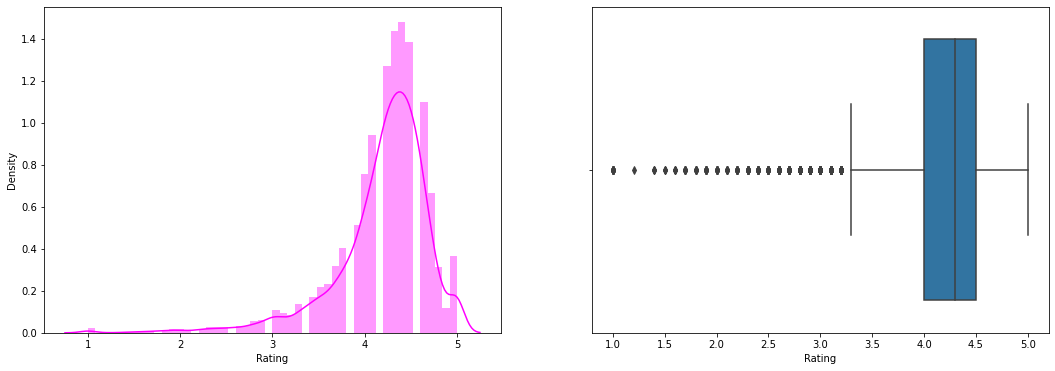

In [17]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
sns.distplot(ps_df['Rating'],color='magenta',ax=ax[0])
sns.boxplot(x='Rating',data=ps_df, ax=ax[1])





*   The mean of the average ratings (excluding the NaN values) comes to be 4.2.
*   The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest is below 4.3.

*   From the distplot visualizations, it is clear that the ratings are left skewed.
*   We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
Hence we will impute the NaN values in the Rating column with its median.





In [18]:
# Replacing the NaN values in the 'Rating' colunm with its median value
ps_df['Rating'].fillna(value=median_rating,inplace=True)


In [39]:
print(ps_df.shape)
ps_df.isnull().sum()

(10829, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Here we go we have removed all NaN values from our Play Store Dataframe



# Removing the NaN values from the User Review Dataframe 




In [19]:
UserReviewInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


In [20]:
# Now lets create new user review Dataframe, as we going to drop all null values
# We have dropped the rows having all null values as it makes no sense in keeping them
new_ur_df = ur_df.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

In [21]:
new_ur_df.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [22]:
# Now here dropna() removes the Null Values from Translated Review
new_ur_df = new_ur_df.dropna(subset= ["Translated_Review"],how = "all")
new_ur_df.shape

(37427, 5)

In [23]:
# Here we write a function to check percentange of NaN Values
def New_UserReviewInfo():
  URinfo_df = pd.DataFrame(index=new_ur_df.columns)
  URinfo_df['Datatypes'] =  new_ur_df.dtypes
  URinfo_df['Count of non-null values'] = new_ur_df.count()
  URinfo_df['NaN values'] = new_ur_df.isnull().sum()
  URinfo_df['% NaN Values'] = (URinfo_df['NaN values']/len(new_ur_df)).round(4)*100 
  URinfo_df['Unique_count'] = new_ur_df.nunique()
  return URinfo_df
New_UserReviewInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,37427,0,0.0,865
Translated_Review,object,37427,0,0.0,27994
Sentiment,object,37427,0,0.0,3
Sentiment_Polarity,float64,37427,0,0.0,5410
Sentiment_Subjectivity,float64,37427,0,0.0,4474


### Here we find we have cleaned all data NaN values present in out User Reviews DataFrame.

# **2. Removing all the Duplicate values from our Dataframe**

In [24]:
# Counts if duplicate value present in our Dataframe
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9648, dtype: int64

Here we see some Apps are duplicated. ROBLOX, CBS Sports App, Candy Crush Saga, 8 Ball Pool, ESPN etc are duplicated.

In [25]:
# dropping duplicates from the 'App' column.
ps_df.drop_duplicates(subset = 'App', inplace = True)
ps_df.shape

(9648, 13)

In [26]:
# Checking whether any duplicate data present in it or not
ps_df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
KineMaster – Pro Video Editor                     1
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9648, dtype: int64

## Here we find we have removed all duplicate data from our dataframe.

# **3. Changing the datatype of the Last Updated column from string to datetime.**

In [39]:

ps_df["Last Updated"] = pd.to_datetime(ps_df['Last Updated'])
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


# **4. Converting the values in theInstallscolumn from string datatype to integer datatype.**

In [40]:
# Checking the contents of the 'Installs' column
ps_df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

Now we have to write a function which converts String in integer. Before converting we need to drop + sign from the data and then we need to convert into integer. 

In [41]:
# function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [42]:
# The drop_plus funtion applied to the main dataframe which converts it in integer
ps_df['Installs'] = ps_df['Installs'].apply(lambda x: convert_plus(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Now, here we see we have removed all + sign and coverted the data in int format.

# **5. Changing the datatype of the Price column from string to float**

In [43]:
#  Checking the contents of the 'Price' column
ps_df['Price'].value_counts()

0          8895
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

Here, we find $ sign we need to drop it and convert the remaining in float.

In [44]:
# function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [45]:
# The drop_dollar funtion applied to the price column which converts it in float
ps_df['Price']=ps_df['Price'].apply(lambda x: convert_dollar(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Hurray! we have converted Price into float.

# **6. Converting the values in the Size column to a same unit of measure(MB)**

In [46]:
#  Checking the contents of the 'Size' column
ps_df['Size'].value_counts()

Varies with device    1226
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

Here M stands for MB and K stands for KB so for proper data Analysis we have to convert same measure. We should convert it in MB.

In [47]:
# function to convert all the entries in KB to MB and then convert them to float datatype.

def convert_kb_to_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [48]:
# The kb_to_mb funtion applied to the size column
ps_df['Size'] = ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Here convert_kb_to_mb function does two things:


*   Firt it convert MB into float type.
*   If it gets value in KB it divides it by 1024 which converts it in MB.



# **7. Converting the datatype of values in the Reviews column from string to int**

In [50]:
# Converting the datatype of the values in the reviews column from string to int
ps_df['Reviews'] = ps_df['Reviews'].astype(int)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Here we dont have any sign in it so we can directly convert it in integer.

# **Exploratory Analysis and Visualization**
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

## **1. Which Category App is most in Play Store**

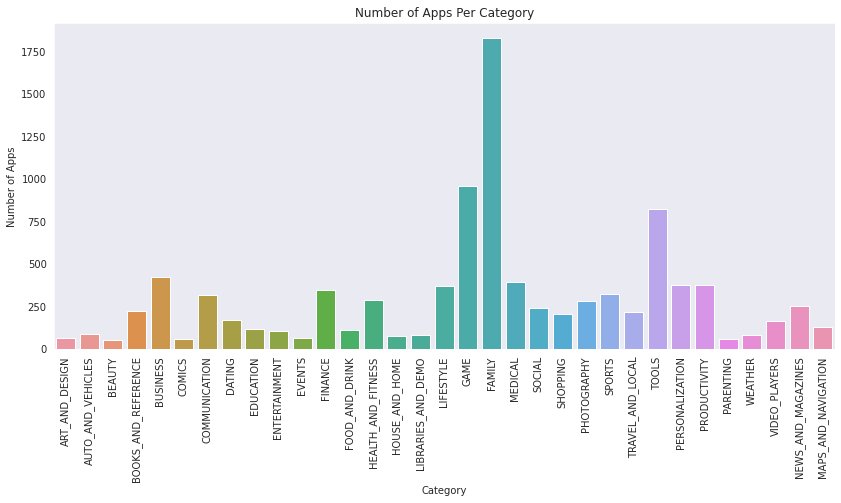

In [28]:
# number of apps for each category
sns.set_style('dark')
plt.figure(figsize=(14, 6))
sns.countplot(x='Category', data=ps_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

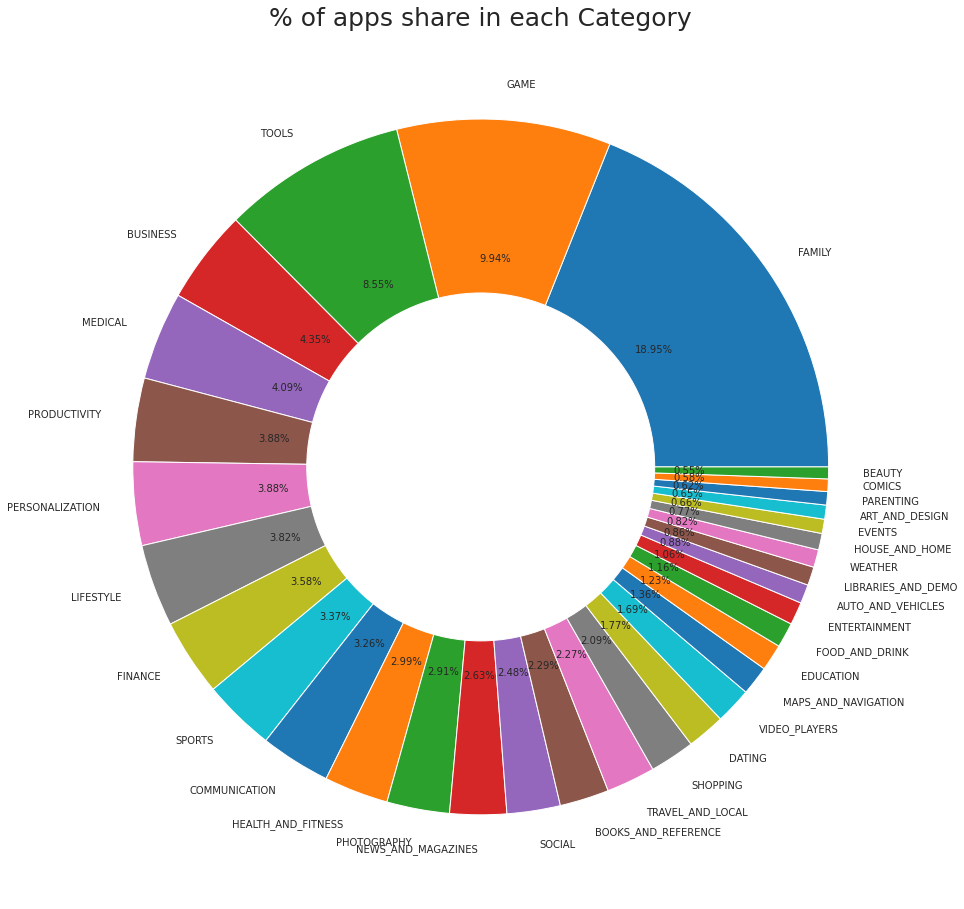

In [34]:
# Percentage of apps belonging to each category in the playstore dataframe
plt.figure(figsize=(16,16))
plt.pie(ps_df.Category.value_counts(), labels=ps_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

After looking at our two graph we conclude that FAMILY, GAME, TOOLS are most in number. In our Dataframe FAMILY category contains 18.95% of Apps on playstore. 

## **2. Which Category App have most number of installs**

Text(0.5, 1.0, 'Total app installs in each category')

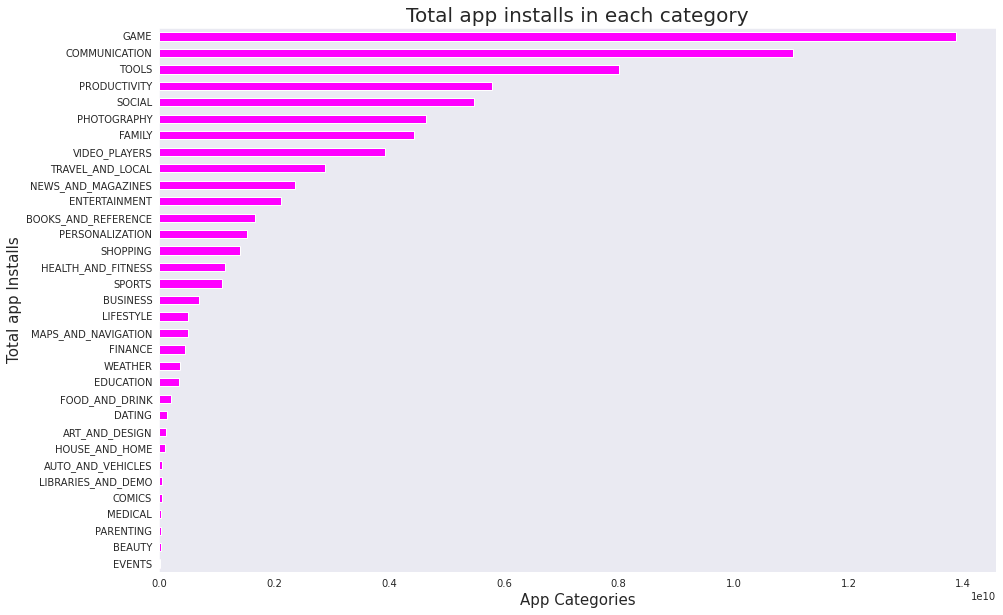

In [53]:
# total app installs in each category of the play store

a = ps_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'magenta', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

Here we conclude that category of apps that has the maximum number of installs. The Game, Communication and Tools categories has the highest number of installs compared to other categories of apps.

# **3. Which category of Apps from the Content Rating column are found more on playstore**

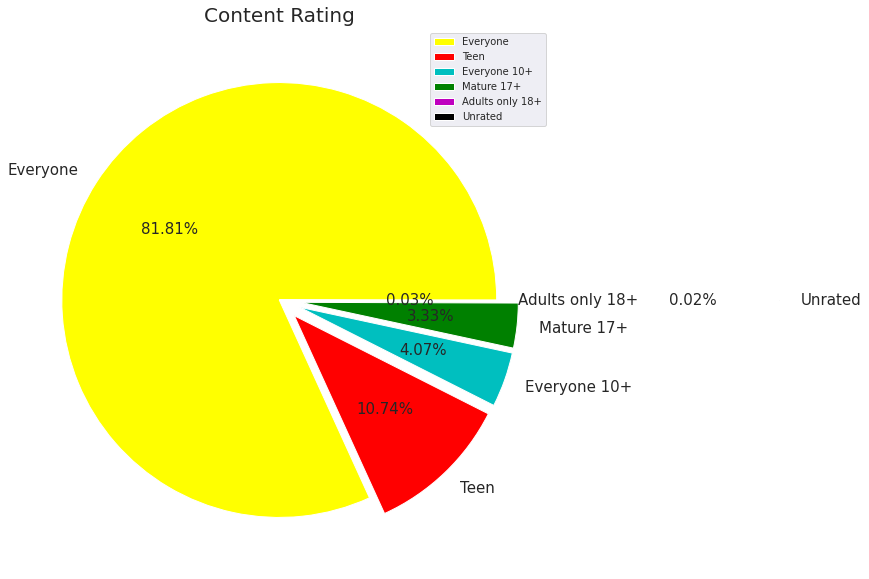

In [56]:
# Content rating of the apps
data = ps_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#creating a  pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['yellow', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

Here we conclude that 81.81% of apps are available for everyone.

# **4. What is the Distribution of the ratings of the apps**

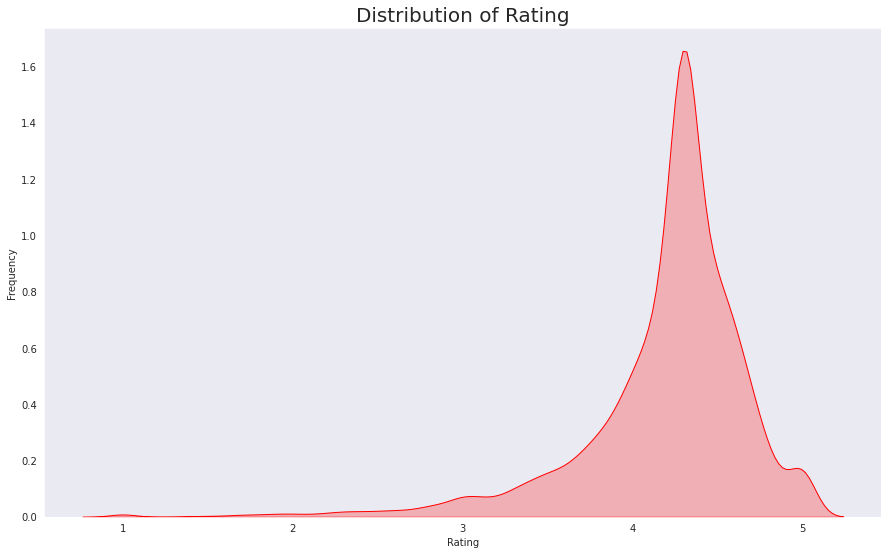

In [57]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(ps_df.Rating, color="Red", shade = True)
plt.title('Distribution of Rating',size = 20);

From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between 3.6 to 4.8